In [7]:
import os 
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
SRC_PATH      = f'/mnt/storage/jcheigh/fictitious-prediction/src'
MAIN_PATH     = os.path.dirname(SRC_PATH)               
DATA_PATH     = f"{MAIN_PATH}/data"
CSV_FPATH     = f'{DATA_PATH}/new_results.csv'
PLOT_PATH     = f'{DATA_PATH}/plots'
PMETA_FPATH   = f'{DATA_PATH}/plot_metadata.json'

In [9]:
df = pd.read_csv(CSV_FPATH)
df.head()

,id,pop_size,lex_size,vocab_size,epsilon,speech_len,alpha,beta,left_prop,num_folds,model,param_grid,scoring,calibrate,cal_method,rho,score
0,1,1000,10,30,0.05,15,3,3,0.5,5,GradientBoostingClassifier(),{},neg_log_loss,True,sigmoid,0.847094,-0.083245
1,1,1000,10,30,0.05,15,3,3,0.5,5,GradientBoostingClassifier(),{},neg_log_loss,True,sigmoid,0.509338,-0.384242
2,1,1000,10,30,0.05,15,3,3,0.5,5,GradientBoostingClassifier(),{},neg_log_loss,True,sigmoid,0.785142,-0.164527
3,1,1000,10,30,0.05,15,3,3,0.5,5,GradientBoostingClassifier(),{},neg_log_loss,True,sigmoid,0.836962,-0.078370
4,1,1000,10,30,0.05,15,3,3,0.5,5,GradientBoostingClassifier(),{},neg_log_loss,True,sigmoid,0.724328,-0.261850


In [4]:
def plot(dataframe, x='rho', y='score', title=None, savefig=False, plot_desc=None, color_by='id'):
    df = dataframe.copy()
    scoring_map = {"accuracy": "Accuracy", "neg_log_loss": "Log Likelihood", "f1": "F1 Score"}

    scoring_name = scoring_map.get(df['scoring'].iloc[0], df['scoring'].iloc[0])
    y_label = scoring_name
    x_label = "Polarization"

    plot_title = title if title else f"{y_label} vs. {x_label}"
    plt.figure(figsize=(12,8))
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    if y_label == 'Log Likelihood':
        df['score'] = df['score'].apply(lambda x : -x) # flip score
    palette = sns.color_palette("husl", len(df[color_by].unique()))

    if df[color_by].nunique() > 1:
        ax = sns.scatterplot(x=x, y=y, hue=color_by, palette=palette, data=df)
    else:
        ax = sns.scatterplot(x=x, y=y, data=df)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(plot_title)

    if savefig:
        PLOT_PATH = os.path.join(os.getcwd(), 'plots')
        os.makedirs(PLOT_PATH, exist_ok=True)
        plot_file_path = os.path.join(PLOT_PATH, f"{plot_title}.jpg")
        plt.savefig(plot_file_path)

        # If plot description is provided, save it to metadata
        if plot_desc is not None:
            metadata = {}
            if os.path.exists(PMETA_FPATH):
                with open(PMETA_FPATH, 'r') as file:
                    metadata = json.load(file)
            metadata[plot_file_path] = plot_desc
            with open(PMETA_FPATH, 'w') as file:
                json.dump(metadata, file, indent=4)

    # 5) Create a box with other parameters
    if df[color_by].nunique() == 1:
        other_params = df.drop(['rho', 'score'], axis=1).iloc[0].to_dict()
        textstr = '\n'.join([f"{key} = {val}" for key, val in other_params.items()])
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

    plt.show()

In [5]:
df2 = df[df['id'] == 2]
df3 = df[df['id'] == 3]
df4 = df[df['id'] == 4]
df4 = df[df['id'] == 5]
df4 = df[df['id'] == 6]


<Figure size 1200x800 with 0 Axes>

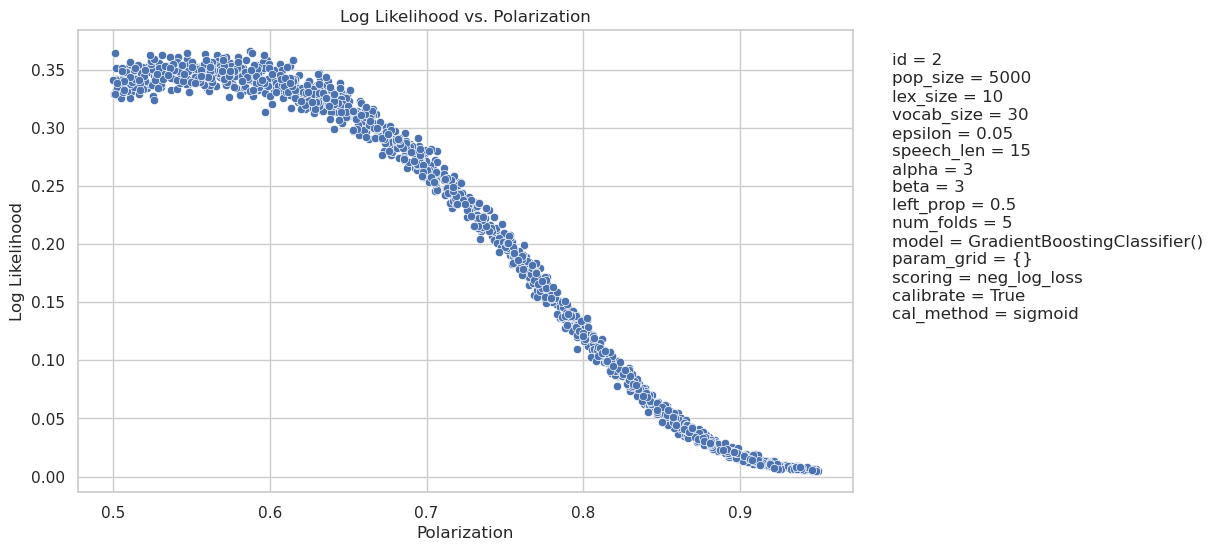

In [6]:
plot(df2)

<Figure size 1200x800 with 0 Axes>

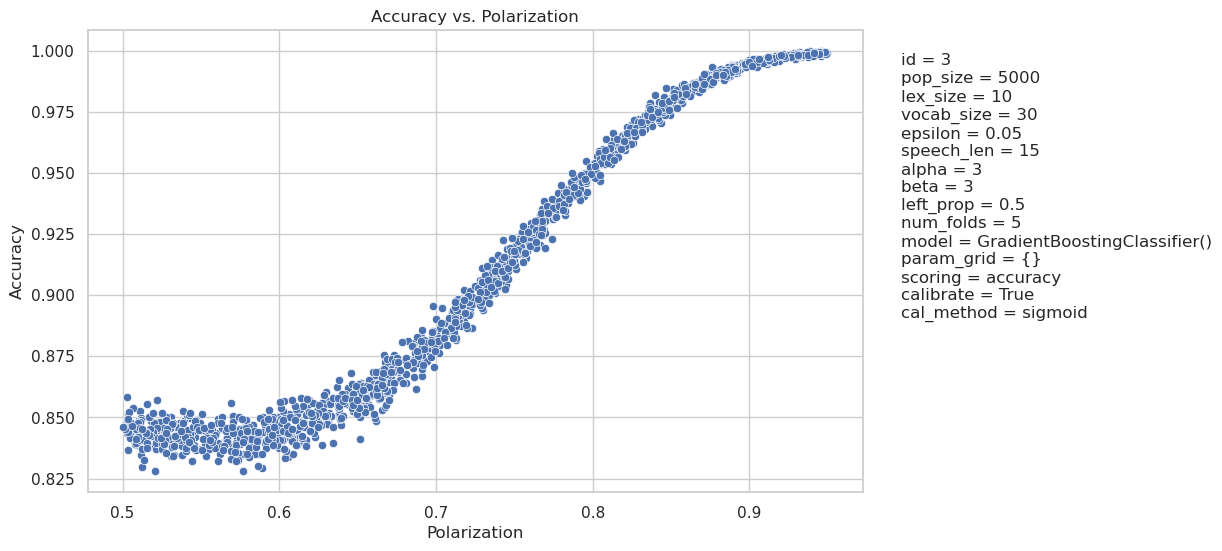

In [12]:
plot(df3)